In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from collections import deque
img = Image.open('mudd_13_pxs2433_708.bmp')
img = img.resize((300, 87))
thresh = 200
fn = lambda x : 255 if x > thresh else 0
r = img.convert('L').point(fn, mode='1')
mat = np.array(r).astype(int)
mat = (mat - 1) * -1 
print(np.array(r))
plt.matshow



[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


<function matplotlib.pyplot.matshow(A: 'ArrayLike', fignum: 'None | int' = None, **kwargs) -> 'AxesImage'>

In [2]:
def bfs_shortest_path(grid, start, goal):
    """
    Perform BFS to find the shortest path in a 2D grid from start to goal.

    Parameters:
    - grid (np.ndarray): 2D array of 0s and 1s, where 0 = open, 1 = wall
    - start (tuple): (row, col) starting position
    - goal (tuple): (row, col) destination position

    Returns:
    - List of (row, col) tuples representing the shortest path, or None if no path exists
    """
    rows, cols = grid.shape
    visited = np.full((rows, cols), False)
    prev = np.full((rows, cols), None, dtype=object)
    
    # Define directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    queue = deque([start])
    visited[start] = True

    while queue:
        current = queue.popleft()
        if current == goal:
            break

        for d in directions:
            nr, nc = current[0] + d[0], current[1] + d[1]
            if 0 <= nr < rows and 0 <= nc < cols:
                if not visited[nr, nc] and grid[nr, nc] == 0:
                    visited[nr, nc] = True
                    prev[nr, nc] = current
                    queue.append((nr, nc))

    # Reconstruct the path
    if not visited[goal]:
        return None  # No path found

    path = []
    at = goal
    while at is not None:
        path.append(at)
        at = prev[at]
    path.reverse()
    return path

In [3]:
def vis_point(mat, point):
    mat_vis = np.copy(mat)
    print(mat_vis[point])
    mat_vis[point] = 50
    plt.matshow(mat_vis)

In [4]:
def traverse(mat, start, end):
    path = bfs_shortest_path(mat, start, end)
    mat_vis = np.copy(mat)
    for loc in path:
        mat_vis[loc] = 5
    plt.matshow(mat_vis)


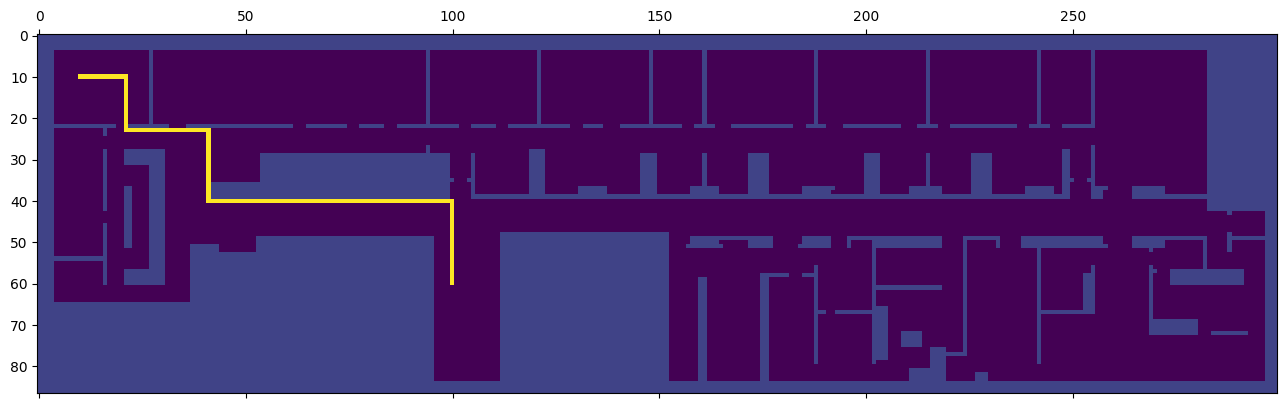

In [5]:
traverse(mat, (60,100), (10,10))

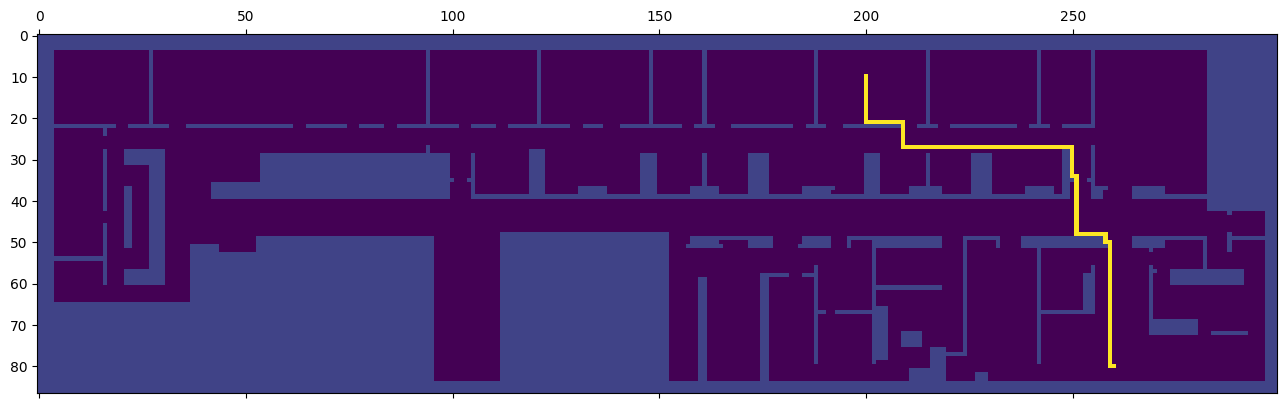

In [6]:
traverse(mat, (10,200), (80,260))

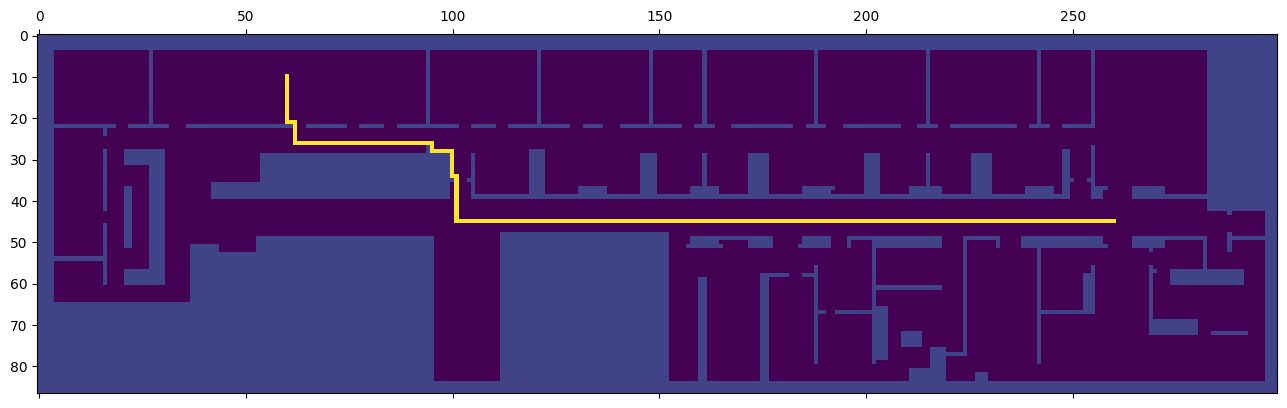

In [7]:
traverse(mat, (10,60), (45,260))

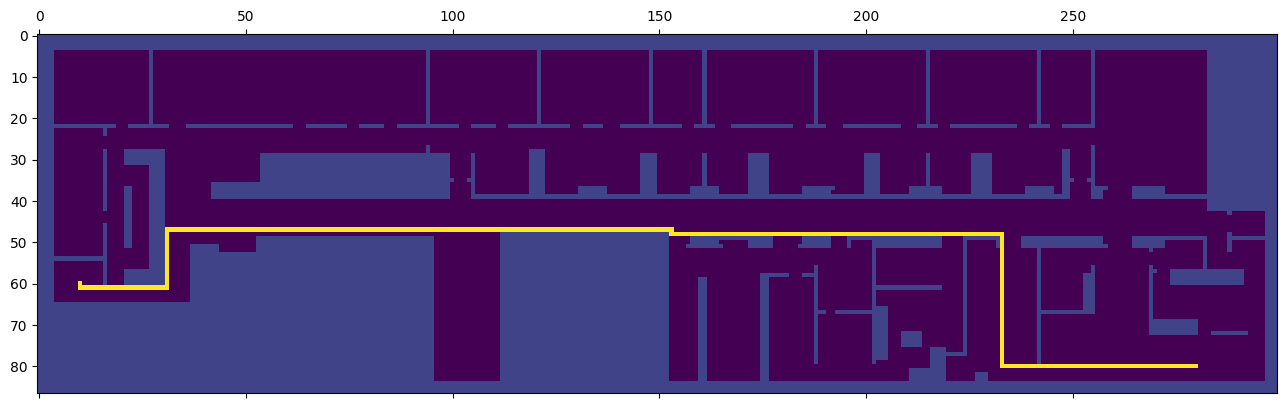

In [8]:
traverse(mat, (60,10), (80,280))